In [6]:
%pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\aldri\appdata\local\programs\python\python37\lib\site-packages (1.3.5)



You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
AUC-ROC: 100.00%


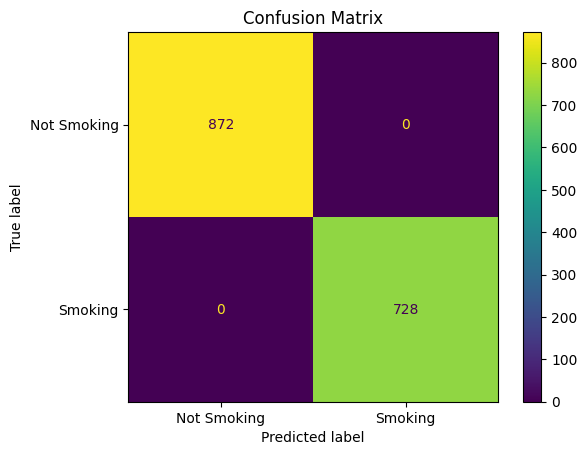

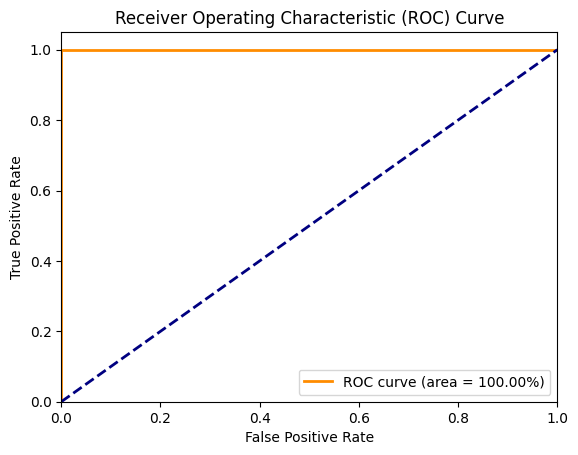

Percentage of class 0 (Not Smoking): 55.20%
Percentage of class 1 (Smoking): 44.80%


In [2]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, roc_auc_score, ConfusionMatrixDisplay
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

directory = os.getcwd()
train_file_path = os.path.join(directory, 'train.csv')
test_file_path = os.path.join(directory, 'test.csv')

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

X = train_df[['Temperature', 'Humidity']]
y = train_df['Label']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=40, 
    stratify=y
)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)
y_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred) * 100
precision = precision_score(y_val, y_val_pred) * 100
recall = recall_score(y_val, y_val_pred) * 100
f1 = f1_score(y_val, y_val_pred) * 100
roc_auc = roc_auc_score(y_val, y_val_pred_proba) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")
print(f"AUC-ROC: {roc_auc:.2f}%")

cm = confusion_matrix(y_val, y_val_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Smoking', 'Smoking'])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f%%)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

X_test = test_df[['Temperature', 'Humidity']]
y_test_pred = rf_model.predict(X_test)

unique, counts = np.unique(y_test_pred, return_counts=True)
percentages = dict(zip(unique, counts / len(y_test_pred) * 100))

print(f"Percentage of class 0 (Not Smoking): {percentages.get(0, 0):.2f}%")
print(f"Percentage of class 1 (Smoking): {percentages.get(1, 0):.2f}%")